In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
df=pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [117]:
df.shape

(200, 6)

In [118]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [119]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [120]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [121]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [122]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [123]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [124]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [125]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [126]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
one=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Sex','BP','Cholesterol']),remainder='passthrough')
x=one.fit_transform(x)
x


array([[ 1.   ,  0.   ,  1.   , ...,  0.   , 23.   , 25.355],
       [ 0.   ,  1.   ,  0.   , ...,  0.   , 47.   , 13.093],
       [ 0.   ,  1.   ,  0.   , ...,  0.   , 47.   , 10.114],
       ...,
       [ 0.   ,  1.   ,  0.   , ...,  0.   , 52.   ,  9.894],
       [ 0.   ,  1.   ,  0.   , ...,  1.   , 23.   , 14.02 ],
       [ 1.   ,  0.   ,  0.   , ...,  1.   , 40.   , 11.349]],
      shape=(200, 9))

In [127]:
feature_names = one.get_feature_names_out()

feature_names

array(['onehotencoder__Sex_F', 'onehotencoder__Sex_M',
       'onehotencoder__BP_HIGH', 'onehotencoder__BP_LOW',
       'onehotencoder__BP_NORMAL', 'onehotencoder__Cholesterol_HIGH',
       'onehotencoder__Cholesterol_NORMAL', 'remainder__Age',
       'remainder__Na_to_K'], dtype=object)

In [128]:
x.shape

(200, 9)

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[ 0.   ,  1.   ,  0.   , ...,  1.   , 67.   ,  9.514],
       [ 0.   ,  1.   ,  0.   , ...,  1.   , 17.   , 10.832],
       [ 1.   ,  0.   ,  1.   , ...,  0.   , 19.   , 13.313],
       ...,
       [ 1.   ,  0.   ,  0.   , ...,  0.   , 24.   , 10.605],
       [ 0.   ,  1.   ,  1.   , ...,  1.   , 49.   ,  6.269],
       [ 0.   ,  1.   ,  0.   , ...,  1.   , 39.   , 13.938]],
      shape=(140, 9))

In [130]:
x_test

array([[ 0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  1.   , 60.   ,
        10.091],
       [ 1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   , 73.   ,
        19.221],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   , 53.   ,
        14.133],
       [ 1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   , 28.   ,
        13.127],
       [ 1.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   , 18.   ,
        37.188],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  1.   , 23.   ,
        14.02 ],
       [ 0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   , 36.   ,
        11.424],
       [ 1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   , 61.   ,
        18.043],
       [ 0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   , 45.   ,
        17.951],
       [ 1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   , 51.   ,
        23.003],
       [ 0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   , 45.   ,
        10.017],
       [ 0.   ,  1.  

In [131]:
y_train

116    drugX
67     drugX
78     drugA
42     drugY
17     drugA
       ...  
133    drugY
137    drugA
72     drugX
140    drugA
37     drugX
Name: Drug, Length: 140, dtype: object

In [132]:
y_test.shape

(60,)

In [133]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA'], dtype=object)

In [134]:
y_test

58     drugX
40     drugY
34     drugX
102    drugC
184    drugY
198    drugX
95     drugX
4      drugY
29     drugY
168    drugY
171    drugX
18     drugC
11     drugY
89     drugY
110    drugA
118    drugA
159    drugX
35     drugX
136    drugB
59     drugY
51     drugX
16     drugX
44     drugX
94     drugY
31     drugB
162    drugX
38     drugX
28     drugY
193    drugC
27     drugX
47     drugC
165    drugY
194    drugY
177    drugY
176    drugA
97     drugY
174    drugA
73     drugY
69     drugY
172    drugY
108    drugB
107    drugY
189    drugY
14     drugX
56     drugB
19     drugY
114    drugX
39     drugX
185    drugY
124    drugB
98     drugY
123    drugY
119    drugY
53     drugY
33     drugY
179    drugY
181    drugX
106    drugX
199    drugX
138    drugB
Name: Drug, dtype: object

In [135]:
y_train.unique()

array(['drugX', 'drugA', 'drugY', 'drugB', 'drugC'], dtype=object)

In [136]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[ 4  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]


In [137]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [138]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [139]:
y_train

116    drugX
67     drugX
78     drugA
42     drugY
17     drugA
       ...  
133    drugY
137    drugA
72     drugX
140    drugA
37     drugX
Name: Drug, Length: 140, dtype: object

In [140]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

[Text(0.625, 0.9, 'remainder__Na_to_K <= 14.839\nentropy = 1.983\nsamples = 140\nvalue = [19, 10, 12, 35, 64]\nclass = drugC'),
 Text(0.5, 0.7, 'onehotencoder__BP_HIGH <= 0.5\nentropy = 1.821\nsamples = 76\nvalue = [19, 10, 12, 35, 0]\nclass = drugB'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'onehotencoder__BP_LOW <= 0.5\nentropy = 0.82\nsamples = 47\nvalue = [0.0, 0.0, 12.0, 35.0, 0.0]\nclass = drugB'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 22\nvalue = [0, 0, 0, 22, 0]\nclass = drugB'),
 Text(0.375, 0.3, 'onehotencoder__Cholesterol_HIGH <= 0.5\nentropy = 0.999\nsamples = 25\nvalue = [0, 0, 12, 13, 0]\nclass = drugB'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]\nclass = drugB'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]\nclass = drugY'),
 Text(0.75, 0.5, 'remainder__Age <= 53.0\nentropy = 0.929\nsamples = 29\nvalue = [19, 10, 0, 0, 0]\nclass = drugX'),
 Text(0.625, 0.3, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 

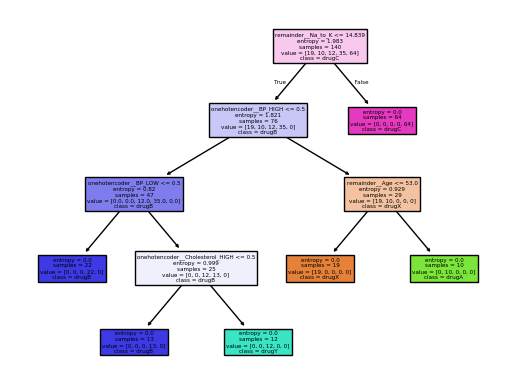

In [143]:
#plot decision tree

from sklearn import tree
plt.Figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['onehotencoder__Sex_F', 'onehotencoder__Sex_M',
       'onehotencoder__BP_HIGH', 'onehotencoder__BP_LOW',
       'onehotencoder__BP_NORMAL', 'onehotencoder__Cholesterol_HIGH',
       'onehotencoder__Cholesterol_NORMAL', 'remainder__Age',
       'remainder__Na_to_K'],class_names=['drugX', 'drugA', 'drugY', 'drugB', 'drugC'],filled=True)


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60

